# Introdução a Pandas

Nessa aula (ou melhor, notebook ~~valeu Corona~~ ) vamos falar um pouco sobre a biblioteca Pandas, sobre como utilizá-la e como fazer as primeiras análises.  

## Sumário

- [Extras de Jupyter](#Extras-de-Jupyter)
- [O que é Pandas](#O-que-é-Pandas?) 
- [Setup Inicial](#Setup-Inicial?)
- [Mãos à Obra](#Mãos-à-obra!)
    - [Importando a Biblioteca](#Importando-a-biblioteca)
    - [Tipos de Estruturas](#Tipos-de-estruturas)
    - [Leitura de dados](#Leitura-de-dados)
    - [Visualização do Dataframe](#Visualização-do-Dataframe)
    - [Seleção dos Dados](#Seleção-dos-dados)
    - [Indexação booleana](#Indexação-booleana)
    - [Operações](#Operações)
    - [Apply](#Apply)
    - [Funções Úteis](#Funções-Úteis)
    - [Dados Faltantes](#Dados-faltantes)
    - [Plot](#Plot)
    - [Exportação](#Exportação)
- [Exercícios](#Exercícios)
- [Conclusão](#Conclusão)
- [Referências](#Referências)
- [Dúvidas?](#Dúvidas?)

## Extras de Jupyter

Já vimos um pouco sobre o que é e como utilizar um Jupyter Notebook, mas esta é uma ferramenta muito poderosa e interessante, então vejamos mais algumas possibilidades legais que ela nos oferece:

- %%time: calcula o tempo de execução de uma célula, para utilizar essa função basta inserir *%%time* no início de uma célula.
- ??: sabe quando você quer usar uma função, mas não lembra os parâmetros? É para isso que serve o *??*. Escrevendo as duas interrogações antes de uma função, ficará visível sua documentação no próprio jupyter!
- ?: uma única interrogação é utilizada para obter informações sobre uma variável.

Os comandos acima podem ser usados assim:

In [2]:
# informações sobre a função range, que vamos usar logo mais
??range

In [1]:
%%time
# calculando o tempo de execução do laço de repetição que utiliza o range e altera a variável soma

soma = 0
for i in range(1000):
    soma += i

CPU times: user 93 µs, sys: 8 µs, total: 101 µs
Wall time: 103 µs


In [3]:
# informações sobre a variável soma
?soma

## O que é Pandas?
Pandas é uma biblioteca Python. Ela permite que façamos uma série de manipulações e análises de dados de forma simples e eficiente.

## Setup Inicial
Assim como boa parte das bibliotecas, é preciso instalar Pandas no seu computador. Isso vai depender um pouco do seu Sistema Operacional, por isso recomendo seguirem os [tutoriais de instalação](https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html).  

Além disso, para que esse notebook funcione adequadamente é preciso que seja feito o download e a extração desse [aquivo](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)  e que ele se encontre na mesma pasta do arquivo desse notebook.

## Mãos à obra!

### Importando a biblioteca
O primeiro passo é importar a biblioteca. Para isso, utilizamos o comando abaixo. 

In [2]:
import pandas as pd

### Tipos de estruturas
Existem basicamente dois tipos de estruturas de dados em Pandas: as Series e os Dataframes.

Uma **Serie** é como uma lista, ou um array unidimensional. Ela é capaz de armazenar diversos tipos de dados (inteiros, strings, floats, objetos....), mas é preciso que os dados de uma Serie sejam todos de um mesmo tipo, ao contrário de uma lista normal que permite misturas. Podemos criar uma serie passando uma lista de valores para a função que a gera:


In [3]:
quantidades = pd.Series([10, 9, 9, 4, 5, 7])

quantidades

0    10
1     9
2     9
3     4
4     5
5     7
dtype: int64

Falamos acima que uma Serie é um array unidimensional, então por que vemos duas colunas ao imprimir Notas?

Bom, isso acontece pois a Serie possui uma coluna de Index, ou seja, uma coluna de rótulos para os seus elementos. Dessa forma, podemos definir nossos próprios indices para uma Serie:

In [4]:
frutas_serie = pd.Series(data = [10, 9, 9, 4, 5, 7], 
                        index = ['Maçã', 'Banana', 'Pera', 'Uva', 'Mamão', 'Laranja'])

frutas_serie

Maçã       10
Banana      9
Pera        9
Uva         4
Mamão       5
Laranja     7
dtype: int64

Para facilitar a criação de Series com idices, podemos utilizar dicionários (vistos na [aula 0](https://github.com/icmc-data/Intro-DS-2020.1/blob/master/Aula0/Jupyter%20e%20Python.ipynb)) da seguinte forma:

In [5]:
dict_frutas = {'Maçã' : 10, 'Banana' : 9, 'Pera' : 9, 'Uva' : 4, 'Mamão' : 5, 'Laranja' : 7}
frutas_serie = pd.Series(dict_frutas)

frutas_serie

Maçã       10
Banana      9
Pera        9
Uva         4
Mamão       5
Laranja     7
dtype: int64

Já um **Dataframe** é mais próximo de uma planilha ou uma tabela, ou seja, uma estrutura bidimensional de dados. Podemos pensar num Dataframe como um conjunto de Series, onde cada uma das colunas da tabela é uma Serie. Cada linha da planilha será um *Exemplo* e terá diversas informações, as quais serão nomeadas nas colunas, e esses são os nossos *Atributos* ou *Features*. Assim como para as Series, podemos criar um Dataframe de diversas maneiras. Por exemplo utilizando um dicionário:

In [6]:
dict_frutas = {'Nome': ['Maçã', 'Banana', 'Pera', 'Uva', 'Mamão', 'Laranja'], 
               'Quantidade': [10, 9, 9, 4, 5, 7], 
               'Preço': [1, 0.5, 9, 4.99, 2.50, 1.99],
               'Fornecedor': ['Beto', 'Ze', 'Chico', 'Tião', 'Jão', 'Marcão']}

frutas_df = pd.DataFrame(dict_frutas)
frutas_df

,Nome,Quantidade,Preço,Fornecedor
0,Maçã,10,1.00,Beto
1,Banana,9,0.50,Ze
2,Pera,9,9.00,Chico
3,Uva,4,4.99,Tião
4,Mamão,5,2.50,Jão
5,Laranja,7,1.99,Marcão


No exemplo acima, temos quatro features (Nome, Quantidade, Preço e Fornecedor) e seis exemplos. Cada exemplo tem um valor para cada uma das suas features.  

Essa é a ideia do Dataframe: linhas de dados separados em colunas.

### Leitura de dados
Em geral os nossos dados são armazenados em arquivos. Precisamos, assim, que as informações sejam lidas do arquivo para que possamos tratá-lo como um Dataframe e utilizar seus métodos.

Existem diferentes funções para ler os arquivos, a depender do seu formato. Por exemplo:

- [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html): lê arquivos no formato csv (comma-separated values)
- [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html): lê planilhas do excel (é preciso instalar uma [extensão](https://pypi.org/project/xlrd/) para utilizá-la)
- [read_htlm](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html): lê tabelas direto de um site

Cada uma dessas funções tem diversos parâmetros que serão mais explorados conforme formos utilizando a biblioteca.
O que todos têm em como é que devemos informar o nome do arquivo jutamente com caminho completo para alcançá-lo.  

Vamos utilizar, no exemplo, a função para ler arquivos no formato csv. Esse tipo de arquivo tem seus valores separados por vírgula, ponto-e-vírgula ou outro caracter. Alguns dos parâmetros relevantes são:

- filepath: o caminho para o arquivo (único parâmetro obrigatório)
- sep: caracter utilizado como separador no arquivo, por padrão é ','
- index_col = coluna que define o indice

O arquivo que utilizaremos nessa aula contém dados sobre o Coronavírus (sempre legal usar dados reais e recentes).

In [7]:
df = pd.read_csv('covid_19_data.csv', index_col = 0)
df

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
9113,03/26/2020,Wyoming,US,2020-03-26 23:53:24,53.0,0.0,0.0
9114,03/26/2020,Xinjiang,Mainland China,2020-03-26 23:53:24,76.0,3.0,73.0
9115,03/26/2020,Yukon,Canada,2020-03-26 23:53:24,3.0,0.0,0.0


### Visualização do Dataframe

Muitas vezes queremos visualizar o nosso Dataframe para obter novas informações, debugar (T.T), tirar dúvidas e muito mais.

Podemos ver a dimensão do dataframe e, assim, saber quantas linhas (exemplos) e quantas colunas (features) temos. Com o atributo **shape** teremos uma tupla com a quantidade de linhas e a quantidade de colunas, respectivamente:

In [8]:
df.shape

(9117, 7)

É possível ver os indices do dataframe com o atributo **index**:

In [9]:
df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            9108, 9109, 9110, 9111, 9112, 9113, 9114, 9115, 9116, 9117],
           dtype='int64', name='SNo', length=9117)

E os nomes das colunas (features) com o atributo **columns**:

In [10]:
df.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

Os tipos dos dados de cada um das colunas com o **dtypes**:

In [11]:
df.dtypes

ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

Os primeiros exemplos do dataframe com o método **head**:

In [12]:
df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


E os últimos exemplos do dataframe com o método **tail**:

In [13]:
df.tail()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
9113,03/26/2020,Wyoming,US,2020-03-26 23:53:24,53.0,0.0,0.0
9114,03/26/2020,Xinjiang,Mainland China,2020-03-26 23:53:24,76.0,3.0,73.0
9115,03/26/2020,Yukon,Canada,2020-03-26 23:53:24,3.0,0.0,0.0
9116,03/26/2020,Yunnan,Mainland China,2020-03-26 23:53:24,178.0,2.0,172.0
9117,03/26/2020,Zhejiang,Mainland China,2020-03-26 23:53:24,1243.0,1.0,1222.0


Uma breve descrição estatística de cada uma das features numéricas com o **describe**:

In [14]:
df.describe()

,Confirmed,Deaths,Recovered
count,9117.000000,9117.000000,9117.000000
mean,766.820774,28.791927,255.273994
std,5322.616735,283.310806,2838.560708
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,21.000000,0.000000,0.000000
75%,162.000000,1.000000,10.000000
max,80589.000000,8215.000000,61201.000000


### Seleção dos dados

Outra funcionalidade muito útil e importante é a de selecionar e acessar parte dos dados.

Podemos, por exemplo, selecionar uma feature específica. Para isso, acessamos o dataframe como se fosse um dicionário (visto na [Aula 0](https://github.com/icmc-data/Intro-DS-2020.1/blob/master/Aula0/Jupyter%20e%20Python.ipynb)), colocando entre colchetes o nome da feature que queremos.  
Vimos quais são as colunas do dataframe com o comando utilizando seu atributo [columns](#Visualização-do-Dataframe), então agora basta acessar qualquer uma delas.

In [15]:
df['Province/State']

SNo
1           Anhui
2         Beijing
3       Chongqing
4          Fujian
5           Gansu
          ...    
9113      Wyoming
9114     Xinjiang
9115        Yukon
9116       Yunnan
9117     Zhejiang
Name: Province/State, Length: 9117, dtype: object

In [16]:
df['ObservationDate']

SNo
1       01/22/2020
2       01/22/2020
3       01/22/2020
4       01/22/2020
5       01/22/2020
           ...    
9113    03/26/2020
9114    03/26/2020
9115    03/26/2020
9116    03/26/2020
9117    03/26/2020
Name: ObservationDate, Length: 9117, dtype: object

Outra possibilidade é a de selecionar uma linha do dataframe. É possível fazê-lo utilizando comandos diferentes:

- [iloc[]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html): acessa uma linha pela sua posição no dataframe. Se acessarmos a posição 1, teremos o segundo exemplo do dataframe.
- [loc[]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html): acessa uma linha por meio de uma *label*. Pode ser, por exemplo, uma indexação booleana (como veremos a seguir) ou o indice da linha. Se acessarmos o indice 1, teremos o primeiro exemplo do dataframe, já que esse é o indice.

Abaixo vemos a execução dos dois. Note que apesar de acessarmos '1' em ambos os casos, com iloc temos o exemplo cujo Name é 2, ou seja, o segundo exemplo do dataframe, enquanto no caso do loc temos o exemplo com Name 1, ou seja, o primeiro exemplo do dataframe.

In [17]:
df.iloc[1]

ObservationDate         01/22/2020
Province/State             Beijing
Country/Region      Mainland China
Last Update        1/22/2020 17:00
Confirmed                       14
Deaths                           0
Recovered                        0
Name: 2, dtype: object

In [18]:
df.loc[1]

ObservationDate         01/22/2020
Province/State               Anhui
Country/Region      Mainland China
Last Update        1/22/2020 17:00
Confirmed                        1
Deaths                           0
Recovered                        0
Name: 1, dtype: object

É importante ressaltar que tanto *loc* quanto *iloc* são ideais para o acesso de linhas, mas não para a sua modificação. Para tanto é preciso utilizar *at* e *iat*, que se comportam de forma semelhante ao *loc* e *iloc* respectivamente.

### Indexação booleana
Já vimos como selecionar linhas e colunas do nosso dataframe, mas e se quisermos selecionar apenas as linhas que cumprem certo requisito?  
Para isso, utilizamos a chamada indexação booleana. Utiliza-se uma expressão que retorna uma Serie ou um Dataframe apenas com valores booleanos (True ou False), o qual é utilizado para fazer a seleção do Dataframe.

Se quisermos, por exemplo, ver apenas as linhas que tem informações dos dias nos quais não houve nenhuma uma morte devido ao vírus. Primeiro geramos uma Serie com valores booleanos:

In [19]:
df['Deaths'] == 0

SNo
1        True
2        True
3        True
4        True
5        True
        ...  
9113     True
9114    False
9115     True
9116    False
9117    False
Name: Deaths, Length: 9117, dtype: bool

Em seguida utilizamos tal Serie para indexar o Dataframe:

In [20]:
df[df['Deaths'] == 0]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
9103,03/26/2020,Tibet,Mainland China,2020-03-26 23:53:24,1.0,0.0,1.0
9107,03/26/2020,Virgin Islands,US,2020-03-26 23:53:24,17.0,0.0,0.0
9110,03/26/2020,West Virginia,US,2020-03-26 23:53:24,52.0,0.0,0.0


Também é possível que mais de uma condição seja considerada. Nesse caso utilizamos os operadores and, or e not como operadores bitwise, ou seja, como &, | e ~.  
Vamos selecionar as linhas que indicam dias nos quais não houve nenhuma morte e nenhum caso confirmado:

In [21]:
df[(df['Deaths'] == 0) & (df['Confirmed'] == 0)]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
11,01/22/2020,Heilongjiang,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
13,01/22/2020,Hong Kong,Hong Kong,1/22/2020 17:00,0.0,0.0,0.0
16,01/22/2020,Inner Mongolia,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
19,01/22/2020,Jilin,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
8779,03/25/2020,Recovered,US,2020-03-25 23:37:49,0.0,0.0,361.0
8986,03/26/2020,American Samoa,US,2020-03-26 23:53:24,0.0,0.0,0.0
9069,03/26/2020,Northern Mariana Islands,US,2020-03-26 23:53:24,0.0,0.0,0.0


Se quisermos saber quanto exemplos satisfazem essas condições, é possível utilizar os operadores (que serão vistos logo mais) nesse novo dataframe filtrado:

In [22]:
df[(df['Deaths'] == 0) & (df['Confirmed'] == 0)].count()

ObservationDate    200
Province/State     154
Country/Region     200
Last Update        200
Confirmed          200
Deaths             200
Recovered          200
dtype: int64

Selecionemos, agora, os exemplos a respeito dos Estados Unidos ou no Brasil.

In [23]:
df[(df['Country/Region'] == 'Brazil') | (df['Country/Region'] == 'US')]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
32,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
70,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0
83,01/23/2020,NaN,Brazil,1/23/20 17:00,0.0,0.0,0.0
118,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0
119,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...
9108,03/26/2020,Virginia,US,2020-03-26 23:53:24,466.0,10.0,0.0
9109,03/26/2020,Washington,US,2020-03-26 23:53:24,3207.0,150.0,0.0
9110,03/26/2020,West Virginia,US,2020-03-26 23:53:24,52.0,0.0,0.0


### Operações
Podemos fazer diversas operações com os nossos dados. Muitas deles já são nativas do próprio Pandas, mas tabém podemos criar as nossas próprias.

Com funções nativas podemos somar todos os valores de cada uma das fetures, encontrar os valores máximo e mínimo, o desvio padrão, a média e muito mais.

In [24]:
# média
df.mean()

Confirmed    766.820774
Deaths        28.791927
Recovered    255.273994
dtype: float64

In [25]:
# desvio padrão
df.std()

Confirmed    5322.616735
Deaths        283.310806
Recovered    2838.560708
dtype: float64

In [26]:
# soma
df.sum()

ObservationDate    01/22/202001/22/202001/22/202001/22/202001/22/...
Country/Region     Mainland ChinaMainland ChinaMainland ChinaMain...
Last Update        1/22/2020 17:001/22/2020 17:001/22/2020 17:001...
Confirmed                                                6.99110e+06
Deaths                                                        262496
Recovered                                                2.32733e+06
dtype: object

In [27]:
# máximo
df.max()

ObservationDate                        03/26/2020
Country/Region     occupied Palestinian territory
Last Update                           3/8/20 5:31
Confirmed                                   80589
Deaths                                       8215
Recovered                                   61201
dtype: object

In [28]:
# mínimo
df.min()

ObservationDate         01/22/2020
Country/Region          Azerbaijan
Last Update        1/22/2020 17:00
Confirmed                        0
Deaths                           0
Recovered                        0
dtype: object

In [29]:
# contagem dos valores não nulos
df.count()

ObservationDate    9117
Province/State     5029
Country/Region     9117
Last Update        9117
Confirmed          9117
Deaths             9117
Recovered          9117
dtype: int64

Se quisermos a média de apenas uma única feature, basta selecioná-la e utilizar o método:

In [30]:
df['Confirmed'].mean()

766.8207743775365

Também é possível fazer operações com os valores das features.  

No caso do dataset que estamos usando, temos a quantidade de casos confirmados e recuperados. Podemos utilizar essas informações para criar uma nova feature, a proporção entre confirmações e recuperações. Para isso basta dividir as features:

In [1]:
df['Proportion'] = df['Recovered'] / df['Confirmed']
df.head()

NameError: name 'df' is not defined

Podemos ver se a operação deu certo utilizando uma indexação booleana:

In [32]:
df[df['Proportion'] > 0]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Proportion
SNo,,,,,,,,
14,01/22/2020,Hubei,Mainland China,1/22/2020 17:00,444.0,17.0,28.0,0.063063
44,01/23/2020,Guangdong,Mainland China,1/23/20 17:00,32.0,0.0,2.0,0.062500
52,01/23/2020,Hubei,Mainland China,1/23/20 17:00,444.0,17.0,28.0,0.063063
85,01/24/2020,Hubei,Mainland China,1/24/20 17:00,549.0,24.0,31.0,0.056466
86,01/24/2020,Guangdong,Mainland China,1/24/20 17:00,53.0,0.0,2.0,0.037736
...,...,...,...,...,...,...,...,...
9106,03/26/2020,Victoria,Australia,2020-03-26 23:53:24,520.0,3.0,149.0,0.286538
9111,03/26/2020,Western Australia,Australia,2020-03-26 23:53:24,231.0,2.0,1.0,0.004329
9114,03/26/2020,Xinjiang,Mainland China,2020-03-26 23:53:24,76.0,3.0,73.0,0.960526


### Apply

Pode ser necessário aplicar uma operação que não está definida na biblioteca aos exemplos. Se quisermos, por exemplo, iterar sobre todas as linhas e deixar os nomes de todos os países com letras minúsculas.
Poderíamos pensar em utilizar uma estrutura de repetição para criar essa nova feature, iterando sobre cada uma das linhas do dataframe. Essa solução não está errada.

In [33]:
%%time

for i in range(df.shape[0]):
    new_value = df.iloc[i]['Country/Region'].lower()
    df['Country/Region'].iat[i] = new_value

CPU times: user 1.27 s, sys: 1.35 ms, total: 1.27 s
Wall time: 1.27 s


Porém existe uma forma mais elegante e eficiente de fazer tal operação: usando o método **apply**. Com ele podemos aplicar uma função a cada uma das linhas do dataframe:

In [34]:
%%time

df['Country/Region'].apply(lambda x : x.lower())

CPU times: user 7.69 ms, sys: 0 ns, total: 7.69 ms
Wall time: 7.54 ms


SNo
1       mainland china
2       mainland china
3       mainland china
4       mainland china
5       mainland china
             ...      
9113                us
9114    mainland china
9115            canada
9116    mainland china
9117    mainland china
Name: Country/Region, Length: 9117, dtype: object

### Funções Úteis
Existem diversas funções que auxiliam a análise dos dados. Vamos ver algumas delas:

O método **info** dá informações sobre o Dataframe incluindo os tipos do index e das colunas, valores não nulos e uso de memória:

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9117 entries, 1 to 9117
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  9117 non-null   object 
 1   Province/State   5029 non-null   object 
 2   Country/Region   9117 non-null   object 
 3   Last Update      9117 non-null   object 
 4   Confirmed        9117 non-null   float64
 5   Deaths           9117 non-null   float64
 6   Recovered        9117 non-null   float64
 7   Proportion       8918 non-null   float64
dtypes: float64(4), object(4)
memory usage: 961.0+ KB


Já vimos antes, mas temos a função **describe**, que nos dá um breve resumo estatístico sobre as features do dataframe:

In [ ]:
df.describe()

Também é possível ver os valores únicos que uma feature pode assumir utilizando o **unique**:

In [36]:
df['Country/Region'].unique()

array(['mainland china', 'hong kong', 'macau', 'taiwan', 'us', 'japan',
       'thailand', 'south korea', 'singapore', 'philippines', 'malaysia',
       'vietnam', 'australia', 'mexico', 'brazil', 'colombia', 'france',
       'nepal', 'canada', 'cambodia', 'sri lanka', 'ivory coast',
       'germany', 'finland', 'united arab emirates', 'india', 'italy',
       'uk', 'russia', 'sweden', 'spain', 'belgium', 'others', 'egypt',
       'iran', 'israel', 'lebanon', 'iraq', 'oman', 'afghanistan',
       'bahrain', 'kuwait', 'austria', 'algeria', 'croatia',
       'switzerland', 'pakistan', 'georgia', 'greece', 'north macedonia',
       'norway', 'romania', 'denmark', 'estonia', 'netherlands',
       'san marino', ' azerbaijan', 'belarus', 'iceland', 'lithuania',
       'new zealand', 'nigeria', 'north ireland', 'ireland', 'luxembourg',
       'monaco', 'qatar', 'ecuador', 'azerbaijan', 'czech republic',
       'armenia', 'dominican republic', 'indonesia', 'portugal',
       'andorra', 'latvia

In [37]:
df['ObservationDate'].unique()

array(['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020',
       '01/26/2020', '01/27/2020', '01/28/2020', '01/29/2020',
       '01/30/2020', '01/31/2020', '02/01/2020', '02/02/2020',
       '02/03/2020', '02/04/2020', '02/05/2020', '02/06/2020',
       '02/07/2020', '02/08/2020', '02/09/2020', '02/10/2020',
       '02/11/2020', '02/12/2020', '02/13/2020', '02/14/2020',
       '02/15/2020', '02/16/2020', '02/17/2020', '02/18/2020',
       '02/19/2020', '02/20/2020', '02/21/2020', '02/22/2020',
       '02/23/2020', '02/24/2020', '02/25/2020', '02/26/2020',
       '02/27/2020', '02/28/2020', '02/29/2020', '03/01/2020',
       '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020',
       '03/06/2020', '03/07/2020', '03/08/2020', '03/09/2020',
       '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020',
       '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020',
       '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020',
       '03/22/2020', '03/23/2020', '03/24/2020', '03/25

Podemos contar, para cada valor único da feature, quantos exemplo são desse tipo com o método **value_counts**, isto é, gerar um histograma:

In [38]:
df['Country/Region'].value_counts()

mainland china         2013
us                     1856
australia               356
canada                  308
france                  167
                       ... 
st. martin                1
channel islands           1
('st. martin',)           1
east timor                1
republic of ireland       1
Name: Country/Region, Length: 210, dtype: int64

Utilizando o value_counts, podemos selecionar os valores mais frequentes. Se quisermos, por exemplo, ver quais são os 10 países mais frequentes no Dataframe:

In [39]:
df['Country/Region'].value_counts()[:10]

mainland china    2013
us                1856
australia          356
canada             308
france             167
uk                 123
south korea         65
thailand            65
taiwan              65
japan               65
Name: Country/Region, dtype: int64

### Dados faltantes
Em geral, quando utilizamos tabelas reais, temos muitos valores faltantes. Isso significa que, para alguns exemplos, não temos informações para algumas de suas features.  
Como cientistas de dados, é importante que saibamos encontrar tais dados e lidar com eles.

É possível ver, para cada exemplo, quais são as features que tem valores faltantes:

In [40]:
df.isna()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Proportion
SNo,,,,,,,,
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
9113,False,False,False,False,False,False,False,False
9114,False,False,False,False,False,False,False,False
9115,False,False,False,False,False,False,False,False


Podemos somar as colunas que indicam se o dado é faltante ou não, o que nos dá uma contagem desses valores. 

In [41]:
df.isna().sum()

ObservationDate       0
Province/State     4088
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
Proportion          199
dtype: int64

É possível lidar com esses valores nulos de diversas formas. Uma delas é apenas ignorar os exemplos que possuem valores nulos, removendo-os do dataframe. Essa função é não é o que chamados de *inplace*, ou seja, as alterações que ela faz são retornadas como uma cópia do dataframe, não alterando-o diretamente.

Vimos acima que temos apenas duas features com valores nulos: Province/State e Proportion. Os valores faltantes de Province/State já vieram assim no arquivo que utilizamos, já os faltantes de Proportion surgiram quando fizemos uma divisão por zero ao gerar a nova feature.  

Por hora vamos ignorar as linhas que tem sua província/estado nula:

In [42]:
print('Dimensões antes de excluir linhas: ', df.shape)
df = df.dropna(subset = ['Province/State'])
print('Dimensões após de excluir linhas: ', df.shape)

Dimensões antes de excluir linhas:  (9117, 8)
Dimensões após de excluir linhas:  (5029, 8)


Note que antes nossas dimensões eram (11341, 8) e passaram a ser (7746, 8), justamente pois excluimos as linhas que não tinham a informação do Estado.  

Vamos ver quantos valores nulos temos agora:

In [43]:
df.isna().sum()

ObservationDate      0
Province/State       0
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
Proportion         153
dtype: int64

Ainda temos proporções que são valores nulos. Vamos lidar com esses valores de outra forma: substituindo-os. Vamos substituir os valores faltantes pela média dos valores existentes em cada uma das features.

In [44]:
df = df.fillna(df.mean())
df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Proportion
SNo,,,,,,,,
1,01/22/2020,Anhui,mainland china,1/22/2020 17:00,1.0,0.0,0.0,0.0
2,01/22/2020,Beijing,mainland china,1/22/2020 17:00,14.0,0.0,0.0,0.0
3,01/22/2020,Chongqing,mainland china,1/22/2020 17:00,6.0,0.0,0.0,0.0
4,01/22/2020,Fujian,mainland china,1/22/2020 17:00,1.0,0.0,0.0,0.0
5,01/22/2020,Gansu,mainland china,1/22/2020 17:00,0.0,0.0,0.0,inf


Vejamos novamente como estamos com nossos dados faltantes:

In [45]:
df.isna().sum()

ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
Proportion         0
dtype: int64

Agora não temos mais valores nulos no nosso Dataframe!

### Plot
Utilizando a própria biblioteca Pandas podemos plotar alguns gráficos com os dados do DataFrame. Os métodos que nos permitem utilizar tal funcionalidade são feitos com base na biblioteca Matplotlib. Tal biblioteca é mais completa e mais eficiente, mas falaremos mais sobre ela na próxima aula. Por enquanto continuaremos utilizando Pandas, que tem uma sintaxe simples para necessidades iniciais.  

Todos os gráficos podem ser utilizado com o atributo **plot**, seguido pelo tipo de gráfico desejado. Vejamos abaixo alguns deles.

**Histograma**

Podemos observar a distribuição dos dados utilizando um histograma. Vejamos a distribuição da contagem das frequências de cada Provincia/Estado:

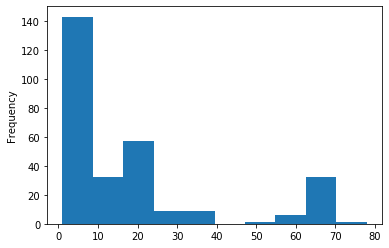

In [46]:
df['Province/State'].value_counts().plot.hist()

**Gráfico de barra**

Um gráfico com barras proporcionais aos valores que são representados em seus eixos. Aqui temos os 10 países/regiões mais frequentes.

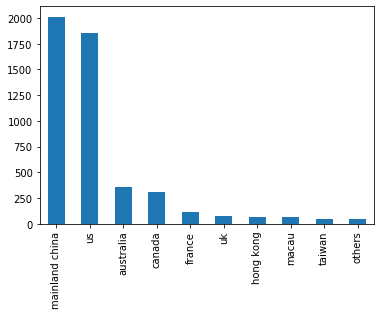

In [47]:
df['Country/Region'].value_counts()[:10].plot.bar()

**Gráfico de barra horizontal**

Mesma ideia do gráfico anterior, mas com as barras horizontais.

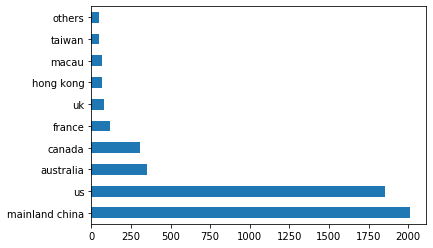

In [48]:
df['Country/Region'].value_counts()[:10].plot.barh()

**Scatter Plot**

Os gráficos de dispersão são utilizados para analisar a relação entre duas variáveis. Vemos, por exemplo, que conforme o número de casos confirmados cresce, o número de casos recuperados também o faz. 

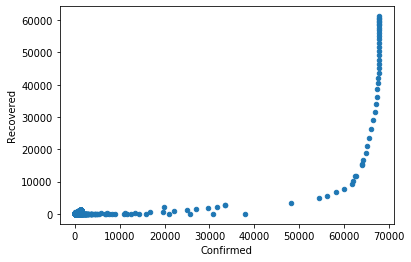

In [49]:
df.plot.scatter(x = 'Confirmed', y = 'Recovered')

**Pie Plot**

Gráficos de pizza são representações proporcionais de dados numéricos. Aqui vemos, dentre os 10 países/regiões mais frequentes, qual a proporção de cada um deles no total.

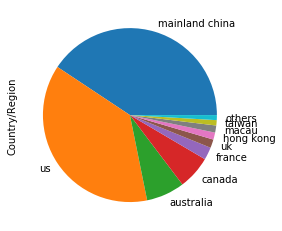

In [50]:
df['Country/Region'].value_counts()[:10].plot.pie()

### Exportação
Assim como lemos os dados de um arquivo, é possível salvar o dataframe criado/modificado num arquivo também. Algumas das possíveis funções são:

- [to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html): exporta o arquivo no formato CSV.
- [to_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html): exporta o arquivo como uma planilha Excel.
- [to_json](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_json.html): exporta o arquivo como o Json.
- [to_latex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_latex.html): exporta o arquivo para Latex.

In [51]:
df.to_csv('covid_after.csv', sep = ',')

## Exercícios

Os exercícios da aula podem ser encontrados [aqui](https://github.com/icmc-data/Intro-DS-2020.1/blob/master/Aula2/introducao_pandas.ipynb).

## Conclusão

Vimos na aula de hoje várias funcionalidades e sintaxes da biblioteca Pandas. Essa biblioteca é bem extensa e possui muuuuuitas funções legais. Recomendamos que façam os exercícios passados e que vejam a documentação das funções que acharem interessantes, pois cada uma delas tem suas próprias especificidades.  

Feedbacks e dúvidas são super bem vindos! Espero que tenham aprendido com essa aula, e sintam-se a vontade para conversar conosco sobre quaisquer dúvidas e curiosidades. o/

## Referências

- [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
- [Uma introdução simples ao Pandas](https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1)
- [Documentação Pandas](https://pandas.pydata.org/docs/)
- [Dataset Original - Kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)

## Dúvidas?

Caso algo não tenha ficado, sintam-se à vontade para entrar em contato conosco por meio do canal do Slack ou pelo telegram! 